In [95]:
import pandas as pd

train=pd.read_csv('C:\\Users\\hwalim\\kaggle\\train.csv')
test=pd.read_csv('C:\\Users\\hwalim\\kaggle\\test.csv')

In [96]:
#그림 바로 볼 수 있게 해주는 도구 %matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [97]:
age_nan_rows=train[train['Age'].isnull()] #Null값인 행만 나타내라

In [98]:
age_nan_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [99]:
#간단한 성별을 0,1로 표시
#LabelEncoder를 이용하여 문자를 0부터 시작하는 정수형 숫자로 바꿔주는 기능
from sklearn.preprocessing import LabelEncoder
train['Sex']=LabelEncoder().fit_transform(train['Sex'])
test['Sex']=LabelEncoder().fit_transform(test['Sex'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [100]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [101]:
#이름에서 앞의 성만 딴다
train['Name']=train['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
titles=train['Name'].unique()
titles
test['Name']=test['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
test_titles=test['Name'].unique()
test_titles


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [102]:
#나이의 nan값을 채워주기 위해서, 이름의 성별로 중간값을 구하자
train['Age'].fillna(-1,inplace=True)
test['Age'].fillna(-1,inplace=True)

medians=dict()
for title in titles:
    median=train.Age[(train["Age"]!=-1)&(train['Name']==title)].median()
    medians[title]=median
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,1,-1.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,Mr,1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Master,1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Mrs,0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Mrs,0,14.0,1,0,237736,30.0708,NaN,C


In [103]:
#결측치를 -1로 대체해주었음
for index, row in train.iterrows():
    if row['Age'] == -1:
        train.loc[index, 'Age'] = medians[row['Name']]

for index, row in test.iterrows():
    if row['Age'] == -1:
        test.loc[index, 'Age'] = medians[row['Name']]

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,Mr,1,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,Mr,1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,Master,1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,Mrs,0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,Mrs,0,14.0,1,0,237736,30.0708,NaN,C


In [104]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [105]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
#null값이 없어짐을 확인
test_age_nan_rows=test[test['Age'].isnull()]

In [108]:
test_age_nan_rows.head() #null값이 없기 때문에 아무것도 출력 되지 않는다

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [109]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


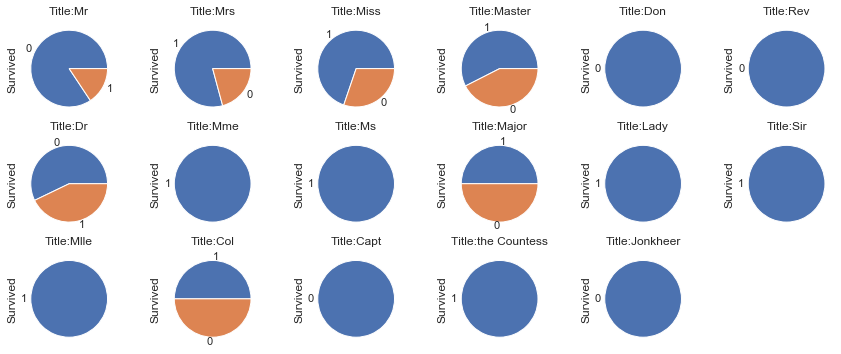

In [110]:
#각 이름별로 산사람과 죽은사람 비교
fig=plt.figure(figsize=(15,6))

i=1
for title in train["Name"].unique():
    fig.add_subplot(3,6,i)
    plt.title('Title:{}'.format(title))
    train.Survived[train['Name']==title].value_counts().plot(kind='pie')
    i+=1
    

In [111]:
#각 이름별로 많이 죽은 성->적게 죽은 성 순서로 값을 매긴다
title_replace={
    'Don':0,
    'Rev':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':1,
    "Dr":2,
    "Major":3,
    "Col":3,
    "Master":4,
    "Miss":5,
    "Mrs":6,
    "Mme":7,
    "Ms":7,
    "Lady":7,
    "Sir":7,
    "Mile":7,
    "the Countess":7
    
}

In [112]:
train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [113]:
#test에는 'Dona'라는 성이 있지만 train에는 없다
test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [114]:
test[test['Name']=='Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,Dona,0,39.0,0,0,PC 17758,108.9,C105,C


In [115]:
Name_func=lambda x: title_replace.get(x)
train['Name']=train['Name'].apply(Name_func)

In [116]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1.0,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,6.0,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,5.0,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,6.0,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1.0,1,35.0,0,0,373450,8.0500,NaN,S


In [117]:
test['Name']=test['Name'].apply(Name_func)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1.0,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,6.0,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1.0,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1.0,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,6.0,0,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             1
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [119]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             2
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
train_test_data=[train,test]

In [121]:
#나이를 세분화, 10살부터 5살 단위로 60살까지
for dataset in train_test_data:
    dataset.loc[dataset['Age']<=10,'Age']=0,
    dataset.loc[(dataset['Age']>10)&(dataset['Age']<=16),'Age']=1,
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=20),'Age']=2,    
    dataset.loc[(dataset['Age']>20)&(dataset['Age']<=26),'Age']=3,
    dataset.loc[(dataset['Age']>26)&(dataset['Age']<=30),'Age']=4,
    dataset.loc[(dataset['Age']>30)&(dataset['Age']<=36),'Age']=5,
    dataset.loc[(dataset['Age']>36)&(dataset['Age']<=40),'Age']=6,
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=46),'Age']=7,
    dataset.loc[(dataset['Age']>46)&(dataset['Age']<=50),'Age']=8,
    dataset.loc[(dataset['Age']>50)&(dataset['Age']<=60),'Age']=9,
    dataset.loc[dataset['Age']>60,'Age']=10

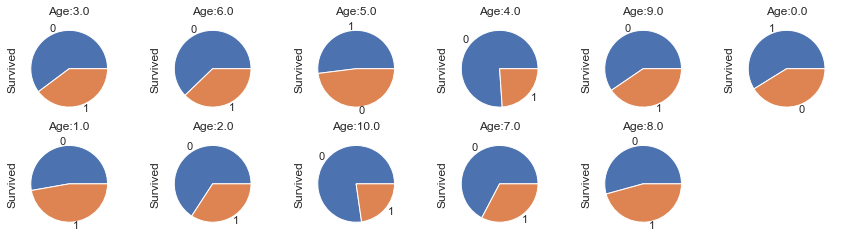

In [122]:
#나눈 나이에 대해 나이별로 죽은 사람과 산 사람 비율을 확인
fig=plt.figure(figsize=(15,6))

i=1
for age in train['Age'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Age:{}'.format(age))
    train.Survived[train['Age']==age].value_counts().plot(kind='pie')
    i+=1
    

In [123]:
age_point_replace={
    0:8,
    1:6,
    2:2,
    3:4,
    4:1,
    5:7,
    6:3,
    7:2,
    8:5,
    9:4,
    10:0
}

In [124]:
for dataset in train_test_data:
    dataset['age_point']=dataset['Age'].apply(lambda x:age_point_replace.get(x))

In [125]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1.0,1,3.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,6.0,0,6.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,5.0,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,6.0,0,5.0,1,0,113803,53.1000,C123,S,7
4,5,0,3,1.0,1,5.0,0,0,373450,8.0500,NaN,S,7


In [126]:
#embared가 nan인 사람은 S로 채워주자. 이를 보다 근거 있는 값으로 채울 수는 없는 지 고민
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S') #결측치를 S로 채워주자

In [127]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)
    #map은 리스트의 요소를 지정된 함수로 처리해주는 함수
    #map은 원본 리스트를 변경하지 않고 새 리스트 생성
    

In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1.0,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4
1,2,1,1,6.0,0,6.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,5.0,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4
3,4,1,1,6.0,0,5.0,1,0,113803,53.1000,C123,0,7
4,5,0,3,1.0,1,5.0,0,0,373450,8.0500,NaN,0,7


In [129]:
#SibSp와 Parch값을 이용하여 FamilySize를 추가한다
for dataset in train_test_data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1 #+1은 자기자신

In [130]:
#FamilySize가 4보다 큰 남자는 아버지일 확률이 높다
maybe_dad_mask=(train['FamilySize']>4)&(train['Sex']==1)

In [131]:
maybe_dad_mask.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [132]:
train['maybe_dad']=1

In [133]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,FamilySize,maybe_dad
0,1,0,3,1.0,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4,2,1
1,2,1,1,6.0,0,6.0,1,0,PC 17599,71.2833,C85,1,3,2,1
2,3,1,3,5.0,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,1,1
3,4,1,1,6.0,0,5.0,1,0,113803,53.1000,C123,0,7,2,1
4,5,0,3,1.0,1,5.0,0,0,373450,8.0500,NaN,0,7,1,1


In [134]:
train.loc[maybe_dad_mask,'maybe_dad']=0

In [135]:
train[train['maybe_dad']==0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,FamilySize,maybe_dad
7,8,0,3,4.0,1,0.0,3,1,349909,21.0750,NaN,0,8,5,0
13,14,0,3,1.0,1,6.0,1,5,347082,31.2750,NaN,0,3,7,0
16,17,0,3,4.0,1,0.0,4,1,382652,29.1250,NaN,2,8,6,0
27,28,0,1,1.0,1,2.0,3,2,19950,263.0000,C23 C25 C27,0,2,6,0
50,51,0,3,4.0,1,0.0,4,1,3101295,39.6875,NaN,0,8,6,0


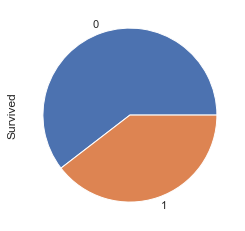

In [136]:
#아버지로 분류된 사람들이나 아버지가 아닌 사람으로 분류된 사람들의 생존비율은 어떻게 될까?
#아버지가 아닌 사람
fig=plt.figure()
ax1=train.Survived[train['maybe_dad']==1].value_counts().plot(kind='pie')

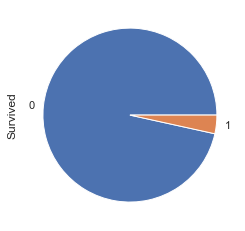

In [137]:
#아버지인 사람
ax2=train.Survived[train['maybe_dad']==0].value_counts().plot(kind='pie')

In [138]:
#FamilySize에 대해서도 새롭게 값을 매기자. 그러기 위해 FamilySize별로 생존비율 확인
train['FamilySize'].unique()


array([ 2,  1,  5,  3,  7,  6,  4,  8, 11], dtype=int64)

In [139]:
test['FamilySize'].unique()

array([ 1,  2,  3,  5,  4,  6,  8,  7, 11], dtype=int64)

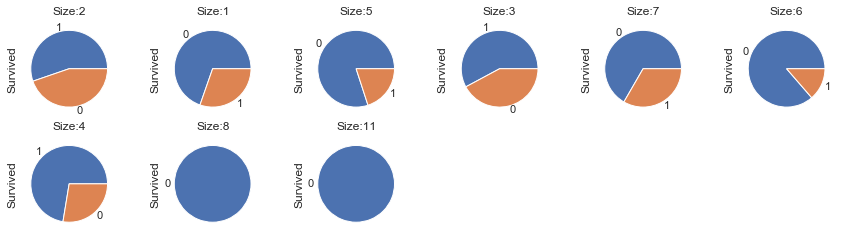

In [140]:
fig=plt.figure(figsize=(15,6))
i=1
for size in train['FamilySize'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Size:{}'.format(size))
    train.Survived[train['FamilySize']==size].value_counts().plot(kind='pie')
    i+=1
    

In [141]:
size_replace={
    1:3,
    2:5,
    3:6,
    4:7,
    5:2,
    6:1,
    7:4,
    8:0,
    11:0
}

In [142]:
for dataset in train_test_data:
    dataset['fs_point']=dataset['FamilySize'].apply(lambda x:size_replace.get(x))
    dataset.drop('FamilySize',axis=1,inplace=True) #FamilySize제거

In [143]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point
0,1,0,3,1.0,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4,1,5
1,2,1,1,6.0,0,6.0,1,0,PC 17599,71.2833,C85,1,3,1,5
2,3,1,3,5.0,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,1,3
3,4,1,1,6.0,0,5.0,1,0,113803,53.1000,C123,0,7,1,5
4,5,0,3,1.0,1,5.0,0,0,373450,8.0500,NaN,0,7,1,3


In [144]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             2
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
age_point        0
maybe_dad        0
fs_point         0
dtype: int64

In [145]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             1
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
age_point        0
fs_point         0
dtype: int64

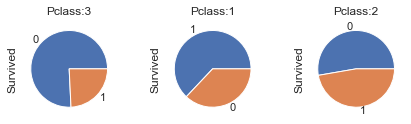

In [146]:
#Pclass별로 생존비율 확인 후 새로운 값 매기기
fig=plt.figure(figsize=(15,6))

i=1
for x in train['Pclass'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Pclass:{}'.format(x))
    train.Survived[train['Pclass']==x].value_counts().plot(kind='pie')
    i+=1

In [147]:
for dataset in train_test_data:
    dataset.loc[dataset['Pclass']==3,'Pclass_point'] = 0
    dataset.loc[dataset['Pclass']==2,'Pclass_point'] = 1
    dataset.loc[dataset['Pclass']==1,'Pclass_point'] = 2

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point
0,1,0,3,1.0,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4,1,5,0.0
1,2,1,1,6.0,0,6.0,1,0,PC 17599,71.2833,C85,1,3,1,5,2.0
2,3,1,3,5.0,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,1,3,0.0
3,4,1,1,6.0,0,5.0,1,0,113803,53.1000,C123,0,7,1,5,2.0
4,5,0,3,1.0,1,5.0,0,0,373450,8.0500,NaN,0,7,1,3,0.0


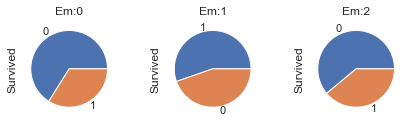

In [149]:
#Embarked별로
fig=plt.figure(figsize=(15,6))
i=1
for x in train['Embarked'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Em:{}'.format(x))
    train.Survived[train['Embarked']==x].value_counts().plot(kind='pie')
    i+=1
    

In [150]:
for dataset in train_test_data:
    dataset.loc[dataset['Embarked']==0,'Em_point']=0
    dataset.loc[dataset['Embarked']==2,'Em_point']=1
    dataset.loc[dataset['Embarked']==1,'Em_point']=2

In [151]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point,Em_point
0,1,0,3,1.0,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4,1,5,0.0,0.0
1,2,1,1,6.0,0,6.0,1,0,PC 17599,71.2833,C85,1,3,1,5,2.0,2.0
2,3,1,3,5.0,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4,1,3,0.0,0.0
3,4,1,1,6.0,0,5.0,1,0,113803,53.1000,C123,0,7,1,5,2.0,0.0
4,5,0,3,1.0,1,5.0,0,0,373450,8.0500,NaN,0,7,1,3,0.0,0.0


In [152]:
train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              2
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
age_point         0
maybe_dad         0
fs_point          0
Pclass_point      0
Em_point          0
dtype: int64

In [153]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [154]:
#Cabin은 해당인원의 숙소가 어디에 있는지에 대한 값, 하지만 값이 너무 다양. 뒤의 숫자 뺴고 고려
#Cabin이 nan값인 사람들은 U로 채우자. U는 단지 nan값을 나타내는 문자열
#요금도 정수형으로 변환
for data in train_test_data:
    data['Cabin'].fillna('U',inplace=True)
    data['Cabin']=data['Cabin'].apply(lambda x: x[0])
    data['Cabin'].unique()
    data['Fare'].fillna(0,inplace=True )#요금
    data['Fare']=data['Fare'].apply(lambda x:int(x))

In [155]:
train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [156]:
temp=train['Fare'].unique()

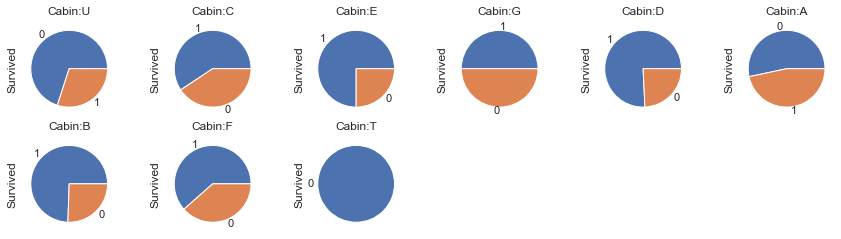

In [157]:
fig=plt.figure(figsize=(15,6))

i=1
for x in train['Cabin'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Cabin:{}'.format(x))
    train.Survived[train['Cabin']==x].value_counts().plot(kind='pie')
    i+=1
    

In [158]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare']<=30,'Fare']=0
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=80),'Fare']=1,
    dataset.loc[(dataset['Fare']>80)&(dataset['Fare']<=100),'Fare']=2,
    dataset.loc[(dataset['Fare']>100),'Fare']=3

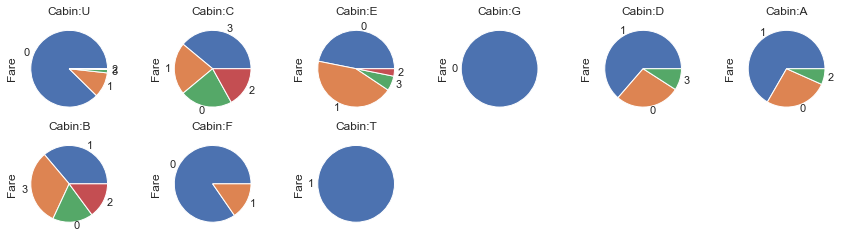

In [159]:
fig=plt.figure(figsize=(15,6))
i=1
for x in train['Cabin'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Cabin:{}'.format(x))
    train.Fare[train['Cabin']==x].value_counts().plot(kind='pie')
    i+=1

In [160]:
#많은 값으로 대체 시키기
for dataset in train_test_data:
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 0), 'Cabin'] = 'G',
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 1), 'Cabin'] = 'T',
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 2), 'Cabin'] = 'C',
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 3), 'Cabin'] = 'B',

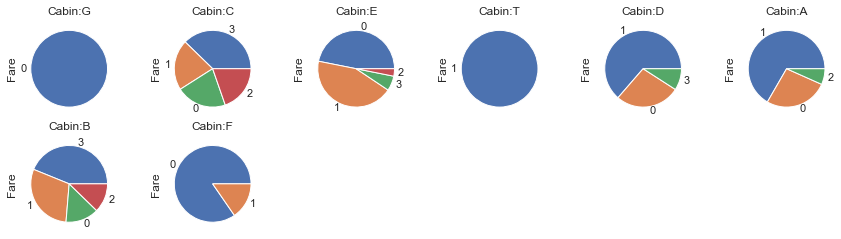

In [161]:
fig=plt.figure(figsize=(15,6))
i=1
for x in train['Cabin'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Cabin:{}'.format(x))
    train.Fare[train['Cabin']==x].value_counts().plot(kind='pie')
    i+=1

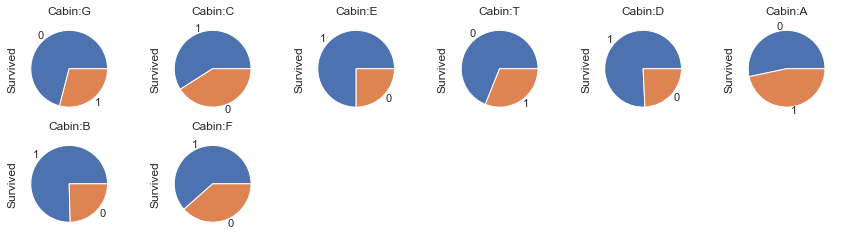

In [162]:
#Cabin의 값별로 생존여부 확인
fig=plt.figure(figsize=(15,6))

i=1
for x in train['Cabin'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Cabin:{}'.format(x))
    train.Survived[train['Cabin']==x].value_counts().plot(kind='pie')
    i+=1
    

In [163]:
for dataset in train_test_data:
    dataset.loc[(dataset['Cabin'] == 'G'), 'Cabin_point'] = 0,
    dataset.loc[(dataset['Cabin'] == 'C'), 'Cabin_point'] = 3,
    dataset.loc[(dataset['Cabin'] == 'E'), 'Cabin_point'] = 5,
    dataset.loc[(dataset['Cabin'] == 'T'), 'Cabin_point'] = 1,
    dataset.loc[(dataset['Cabin'] == 'D'), 'Cabin_point'] = 7,
    dataset.loc[(dataset['Cabin'] == 'A'), 'Cabin_point'] = 2,
    dataset.loc[(dataset['Cabin'] == 'B'), 'Cabin_point'] = 6,
    dataset.loc[(dataset['Cabin'] == 'F'), 'Cabin_point'] = 4,
    

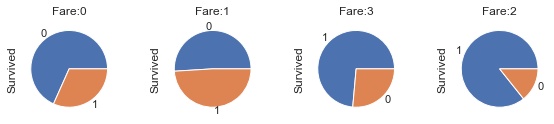

In [164]:
#Fare별로 생존여부 확인 및 점수 대체
fig=plt.figure(figsize=(15,6))

i=1
for x in train['Fare'].unique():
    fig.add_subplot(3,6,i)
    plt.title('Fare:{}'.format(x))
    train.Survived[train['Fare']==x].value_counts().plot(kind='pie')
    i+=1

In [165]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare']==0),'Fare_point']=0,
    dataset.loc[(dataset['Fare']==1),'Fare_point']=1,
    dataset.loc[(dataset['Fare']==2),'Fare_point']=3,
    dataset.loc[(dataset['Fare']==3),'Fare_point']=2

In [166]:
#모든 값을 정규화
from sklearn.preprocessing import StandardScaler
for dataset in train_test_data:
    dataset['Name']=StandardScaler().fit_transform(dataset['Name'].values.reshape(-1,1))
    dataset['Sex']=StandardScaler().fit_transform(dataset['Sex'].values.reshape(-1,1))
#     dataset['maybe_dad'] = StandardScaler().fit_transform(dataset['maybe_dad'].values.reshape(-1, 1))
    dataset['fs_point']=StandardScaler().fit_transform(dataset['fs_point'].values.reshape(-1,1))
    dataset['Em_point'] = StandardScaler().fit_transform(dataset['Em_point'].values.reshape(-1, 1))
    dataset['Cabin_point'] = StandardScaler().fit_transform(dataset['Cabin_point'].values.reshape(-1, 1))
    dataset['Pclass_point'] = StandardScaler().fit_transform(dataset['Pclass_point'].values.reshape(-1, 1))
    dataset['age_point'] = StandardScaler().fit_transform(dataset['age_point'].values.reshape(-1, 1))
    dataset['Fare_point'] = StandardScaler().fit_transform(dataset['Fare_point'].values.reshape(-1, 1))

C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was

In [167]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,1,0,3,-0.795498,0.737695,3.0,1,0,A/5 21171,0,G,0,0.122488,1,0.894514,-0.827377,-0.585954,-0.562920,-0.512784
1,2,1,1,1.547769,-1.355574,6.0,1,0,PC 17599,1,C,1,-0.294065,1,0.894514,1.566107,1.942303,0.840704,0.914998
2,3,1,3,1.079116,-1.355574,3.0,0,0,STON/O2. 3101282,0,G,0,0.122488,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784
3,4,1,1,1.547769,-1.355574,5.0,1,0,113803,1,C,0,1.372147,1,0.894514,1.566107,-0.585954,0.840704,0.914998
4,5,0,3,-0.795498,0.737695,5.0,0,0,373450,0,G,0,1.372147,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784


In [168]:
test.head(0)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point


In [169]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,1,0,3,-0.795498,0.737695,3.0,1,0,A/5 21171,0,G,0,0.122488,1,0.894514,-0.827377,-0.585954,-0.562920,-0.512784
1,2,1,1,1.547769,-1.355574,6.0,1,0,PC 17599,1,C,1,-0.294065,1,0.894514,1.566107,1.942303,0.840704,0.914998
2,3,1,3,1.079116,-1.355574,3.0,0,0,STON/O2. 3101282,0,G,0,0.122488,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784
3,4,1,1,1.547769,-1.355574,5.0,1,0,113803,1,C,0,1.372147,1,0.894514,1.566107,-0.585954,0.840704,0.914998
4,5,0,3,-0.795498,0.737695,5.0,0,0,373450,0,G,0,1.372147,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784


In [170]:
train.drop(['PassengerId','Pclass','SibSp','Parch','Ticket','Fare','Embarked','Cabin','Age'], axis=1, inplace=True)

In [171]:
train.head()

,Survived,Name,Sex,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,0,-0.795498,0.737695,0.122488,1,0.894514,-0.827377,-0.585954,-0.562920,-0.512784
1,1,1.547769,-1.355574,-0.294065,1,0.894514,1.566107,1.942303,0.840704,0.914998
2,1,1.079116,-1.355574,0.122488,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784
3,1,1.547769,-1.355574,1.372147,1,0.894514,1.566107,-0.585954,0.840704,0.914998
4,0,-0.795498,0.737695,1.372147,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784


In [172]:
test.drop(['Pclass','SibSp','Ticket','Fare','Embarked','Cabin','Age'],axis=1,inplace=True)

In [173]:
train.head()

,Survived,Name,Sex,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,0,-0.795498,0.737695,0.122488,1,0.894514,-0.827377,-0.585954,-0.562920,-0.512784
1,1,1.547769,-1.355574,-0.294065,1,0.894514,1.566107,1.942303,0.840704,0.914998
2,1,1.079116,-1.355574,0.122488,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784
3,1,1.547769,-1.355574,1.372147,1,0.894514,1.566107,-0.585954,0.840704,0.914998
4,0,-0.795498,0.737695,1.372147,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784


In [174]:
test.head()

,PassengerId,Name,Sex,Parch,age_point,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,892,-0.823676,0.755929,0,1.545826,-0.594307,-0.873482,0.470915,-0.546675,-0.523704
1,893,1.484610,-1.322876,0,0.667301,0.833396,-0.873482,-0.700767,-0.546675,-0.523704
2,894,-0.823676,0.755929,0,-1.529012,-0.594307,0.315819,0.470915,-0.546675,-0.523704
3,895,-0.823676,0.755929,0,-1.089749,-0.594307,-0.873482,-0.700767,-0.546675,-0.523704
4,896,1.484610,-1.322876,1,0.228038,1.547247,-0.873482,-0.700767,-0.546675,-0.523704


In [175]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']

In [176]:
train_data.head()

,Name,Sex,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,-0.795498,0.737695,0.122488,1,0.894514,-0.827377,-0.585954,-0.562920,-0.512784
1,1.547769,-1.355574,-0.294065,1,0.894514,1.566107,1.942303,0.840704,0.914998
2,1.079116,-1.355574,0.122488,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784
3,1.547769,-1.355574,1.372147,1,0.894514,1.566107,-0.585954,0.840704,0.914998
4,-0.795498,0.737695,1.372147,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784


In [177]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [178]:
test.shape

(418, 10)

In [209]:
test.head()

,PassengerId,Name,Sex,Parch,age_point,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,892,-0.823676,0.755929,0,1.545826,-0.594307,-0.873482,0.470915,-0.546675,-0.523704
1,893,1.484610,-1.322876,0,0.667301,0.833396,-0.873482,-0.700767,-0.546675,-0.523704
2,894,-0.823676,0.755929,0,-1.529012,-0.594307,0.315819,0.470915,-0.546675,-0.523704
3,895,-0.823676,0.755929,0,-1.089749,-0.594307,-0.873482,-0.700767,-0.546675,-0.523704
4,896,1.484610,-1.322876,1,0.228038,1.547247,-0.873482,-0.700767,-0.546675,-0.523704


In [179]:
train.shape

(891, 10)

In [211]:
train.head()

,Survived,Name,Sex,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point
0,0,-0.795498,0.737695,0.122488,1,0.894514,-0.827377,-0.585954,-0.562920,-0.512784
1,1,1.547769,-1.355574,-0.294065,1,0.894514,1.566107,1.942303,0.840704,0.914998
2,1,1.079116,-1.355574,0.122488,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784
3,1,1.547769,-1.355574,1.372147,1,0.894514,1.566107,-0.585954,0.840704,0.914998
4,0,-0.795498,0.737695,1.372147,1,-0.523657,-0.827377,-0.585954,-0.562920,-0.512784


In [180]:
train_data.shape

(891, 9)

In [210]:
train_data.head(0)

,Name,Sex,age_point,maybe_dad,fs_point,Pclass_point,Em_point,Cabin_point,Fare_point


In [181]:
target.shape

(891,)

In [222]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy as np

x_train=train.drop(labels=["Survived"],axis=1)
y_train=train["Survived"]

y_train=np_utils.to_categorical(y_train)
test_data=test.drop("PassengerId",axis=1)

model=Sequential()
model.add(Dense(10,input_dim=9))
model.add(Dense(10))
model.add(Dense(20,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

model.fit(x_train,y_train,epochs=100,batch_size=3,validation_split=0.2)

y_predict=model.predict(test_data)
y_predict=np.argmax(y_predict,axis=1)
print(y_predict)
y_predict=pd.Series(y_predict,name='Survived')
print("loss:",loss)
print("acc:",acc)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 10)                100       
_________________________________________________________________
dense_112 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_113 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_114 (Dense)            (None, 25)                525       
_________________________________________________________________
dense_115 (Dense)            (None, 2)                 52        
Total params: 1,007
Trainable params: 1,007
Non-trainable params: 0
_________________________________________________________________
Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/step - lo

712/712 [==============================] - 1s 1ms/step - loss: 0.6695 - acc: 0.6096 - val_loss: 0.6542 - val_acc: 0.6425
Epoch 55/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6696 - acc: 0.6096 - val_loss: 0.6555 - val_acc: 0.6425
Epoch 56/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6697 - acc: 0.6096 - val_loss: 0.6544 - val_acc: 0.6425
Epoch 57/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6695 - acc: 0.6096 - val_loss: 0.6545 - val_acc: 0.6425
Epoch 58/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6697 - acc: 0.6096 - val_loss: 0.6550 - val_acc: 0.6425
Epoch 59/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6693 - acc: 0.6096 - val_loss: 0.6540 - val_acc: 0.6425
Epoch 60/100
712/712 [==============================] - 1s 1ms/step - loss: 0.6700 - acc: 0.6096 - val_loss: 0.6550 - val_acc: 0.6425
Epoch 61/100
712/712 [==============================] - 1s 1ms/step - loss:

In [224]:
submission=pd.concat([pd.Series(range(892,1310),name="PassengerId"),y_predict],axis=1)
submission.to_csv("D:\\STUDY\\dnn_titanic_dataset.csv",index=False)